In [1]:
# work in progress

In [2]:
# TODO

# - add plots for vanilla functions with different parameters
# - in total we need 60 min / 5 min = 12 seeds (3 skin areas á 4 heat pain applications)
# - estimate number of resulting data for neural network training

In [3]:
import sys
from pathlib import Path
PROJECT_DIR = Path.cwd()
if PROJECT_DIR.stem == 'notebooks':
    PROJECT_DIR = PROJECT_DIR.parent
    sys.path.insert(0, '..')
    %load_ext autoreload
    %autoreload 2

In [4]:
from src.experiments.stimuli_function import StimuliFunction, stimuli_extra
import numpy as np
import matplotlib.pyplot as plt

minimal_desired_duration = 200 # in seconds
periods = [67*2, 20] # [0] is the baseline and [1] the modulation; in seconds
frequencies = 1./np.array(periods)
amplitudes = [1, 1.5] # temp range is 2 * sum(amplitudes): max @ VAS 70, min @ VAS 0
sample_rate = 10
seed = None #823 # use None for random seed
baseline_temp = 39.2 # @ VAS 35

stimuli = StimuliFunction(
    minimal_desired_duration,
    frequencies,
    amplitudes,
    sample_rate,
    random_periods=True,
    seed=seed
).add_baseline_temp(
    baseline_temp
).add_plateaus(
    plateau_duration=20, 
    n_plateaus=4, 
    add_at_start="random", 
    add_at_end=True)
print(f"Seed: {stimuli.seed}")
_ = stimuli_extra(stimuli.wave, stimuli.wave_dot, stimuli.sample_rate, s_RoC=0.2)

Seed: 73


Cooling segments [s] based on 'Label_alt' with a rate of change threshold of 0.2 (°C/s):

count    4.00
mean     6.35
std      3.64
min      3.00
25%      3.30
50%      6.40
75%      9.45
max      9.60
dtype: object


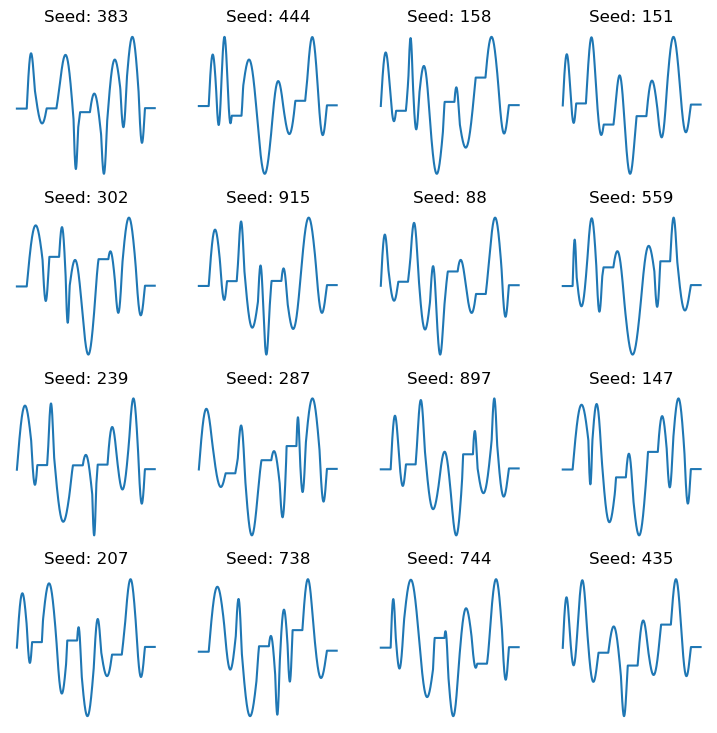

In [5]:
# Plot stimuli
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(9, 9), dpi=100)
random_seeds = np.random.randint(0, 1000, rows*cols)

for ax, random_seed in zip(axes.flat, random_seeds):
    stimuli = StimuliFunction(
        minimal_desired_duration,
        frequencies,
        amplitudes,
        sample_rate,
        random_periods=True,
        seed=random_seed
    ).add_plateaus(
        plateau_duration=20, 
        n_plateaus=4, 
        add_at_start="random", 
        add_at_end=True
    ).wave
    ax.plot(stimuli)
    ax.set_title(f"Seed: {random_seed}")
    ax.axis(False)